In [24]:
import librosa
import librosa.display
import os
import pandas as pd
import glob 
import matplotlib.pyplot as plt

In [11]:
# 1. Get the file path to the included audio example
filename = librosa.util.example_audio_file()
filename="C:/Users/hasik/Corpus/Corpus/A_man_bought_a_car_in_Paris-DC-1.wav"

In [12]:
# 2. Load the audio as a waveform `y`
#    Store the sampling rate as `sr`
y, sr = librosa.load(filename)

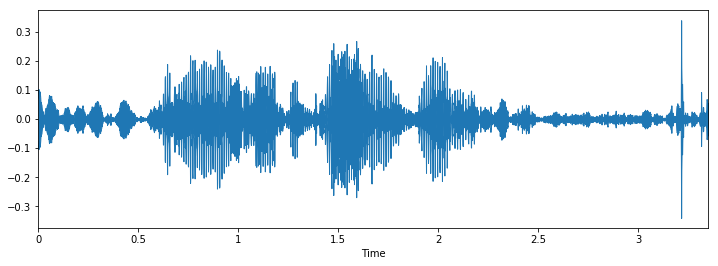

In [27]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(y, sr)

In [13]:
# 3. Run the default beat tracker
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

print('Estimated tempo: {:.2f} beats per minute'.format(tempo))


Estimated tempo: 123.05 beats per minute


In [14]:
# 4. Convert the frame indices of beat events into timestamps
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

print('Saving output to beat_times.csv')
librosa.output.times_csv('beat_times.csv', beat_times)

Saving output to beat_times.csv


Generate mfccs from a time series

In [17]:
librosa.feature.mfcc(y=y, sr=sr)

array([[-254.42157037, -284.79175981, -338.18388266, ..., -287.22874259,
        -257.26964897, -285.2501446 ],
       [  47.84495558,   72.02969489,  108.54815683, ...,  144.71426349,
         164.76322809,  149.99870743],
       [   9.0731565 ,    5.04562983,  -15.20983885, ...,  -26.27809123,
         -20.95366064,   -4.61067157],
       ...,
       [  11.27238146,    6.02974079,    4.36309541, ...,    1.71354881,
          -1.72523854,    1.94780715],
       [  -7.41270413,   -7.81658033,    1.2092183 , ...,   -7.03731676,
          -5.77168711,   -3.85160198],
       [  14.07362746,   16.65971861,   11.95271778, ...,    4.94161684,
           1.77731266,   -0.98836506]])

Use a pre-computed log-power Mel spectrogram

In [18]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)   

In [19]:
librosa.feature.mfcc(S=librosa.power_to_db(S))

array([[-248.6608856 , -275.19554003, -320.14292002, ..., -264.7003351 ,
        -232.16891681, -265.64082952],
       [  45.49103552,   67.559696  ,   96.97085905, ...,  130.43402418,
         149.92427366,  140.54893507],
       [   9.53207787,    2.06318282,  -19.49967539, ...,  -36.35437405,
         -31.34454576,  -16.12956214],
       ...,
       [   7.45124609,    9.73941574,    9.41015831, ...,    2.27756096,
           0.33824853,   -2.98009313],
       [   1.4972117 ,    5.71039148,    8.69392993, ...,   -2.25396569,
          -5.26926262,   -0.73339815],
       [  -0.77813143,   -2.43221644,   -1.86279706, ...,    1.88164414,
           3.21240517,    1.57160129]])

More components

In [20]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

Visualize the MFCC series

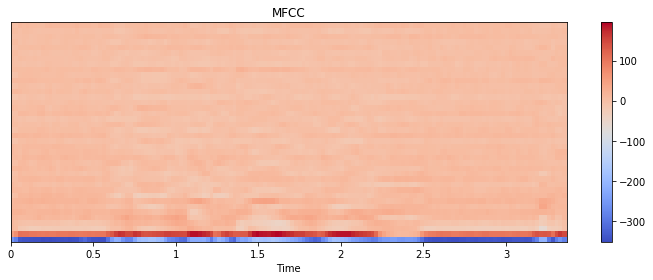

In [25]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()